This notebook serves to be where we test code for any step of the data pipeline (Acquire, Clean, Explore, test/model, etc.)

If we want to later have a cleaner notebook of our findings, viz's, conclusions, etc., we can make another notebook called something like `report.ipynb`

Import below. Make a small comment on what import is for if the import isn't a common library/module.

In [31]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from bs4 import BeautifulSoup
import requests
from glob import glob
import os

In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [33]:
import acquire

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

## Acquire data

Data from [Baseball Reference](https://www.baseball-reference.com)


Use this area to test code that will help you write data acquisition funnctions

In [43]:
# Read all csv's in data folder
csv_files = glob("data/*.csv")

# Read csv's to DataFrames. 
# Store in dictionary where key is filename and value is the DataFrame
csv_dfs = {}
for file in csv_files:
    # Create filename string which will be the name of the key
    filename = os.path.basename(file).replace(".csv", "")
    # Read file into DataFrame
    file_df = pd.read_csv(file, low_memory=False)
    # Store DataFrame as a value
    csv_dfs[filename] = file_df
    
# view key's
csv_dfs.keys() 

dict_keys(['team_batting', 'player_pitching', 'player_batting', 'team_pitching'])

In [44]:
for k, df in csv_dfs.items():
    display(df)

,year,W,L,W-L%,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,Outs,RC,RC/G,AIR,lgBA,lgOBP,lgSLG,lgOPS,OWn%,BtRuns,BtWins,TotA,SecA,PwrSpd
0,2005,88,74,0.543,Philadelphia Phillies,40,30.0,4.98,162,6345,5542,807,1494,282,35,167,760,116,27,639,1083,0.270,0.348,0.423,0.772,98,2347,107,56,62,46,76,1251,0.348,96,0.306,0.154,2.6%,17.1%,10.1%,NaN,NaN,20.9%,40.7%,27.5%,0.72,28.4%,53.7%,17.9%,2.0,0.8%,70.8,31%,81%,37%,4290,876,5.4,112,0.274,0.345,0.437,0.782,0.555,-17.9,-1.9,0.755,0.285,136.9
1,2005,81,81,0.500,Washington Nationals,55,29.3,3.94,162,6142,5426,639,1367,311,32,117,615,45,45,491,1090,0.252,0.322,0.386,0.708,89,2093,130,89,91,45,55,1137,0.317,87,0.293,0.134,1.9%,17.8%,8.0%,NaN,NaN,18.9%,44.5%,25.6%,0.85,25.5%,55.2%,19.3%,-9.2,-9.9%,-81.9,28%,50%,42%,4370,692,4.2,104,0.263,0.332,0.418,0.750,0.439,-75.9,-7.5,0.642,0.224,65.0
2,2005,80,82,0.494,Toronto Blue Jays,37,27.9,4.78,162,6233,5581,775,1480,307,39,136,735,72,35,486,955,0.265,0.331,0.407,0.738,94,2273,126,89,21,56,18,1118,0.331,94,0.296,0.142,2.2%,15.3%,7.8%,NaN,NaN,19.3%,44.9%,26.4%,0.83,28.3%,52.5%,19.2%,-5.7,-3.8%,6.0,33%,67%,39%,4339,762,4.7,107,0.271,0.334,0.429,0.763,0.480,-44.3,-4.3,0.685,0.236,94.2
3,2005,79,83,0.488,Texas Rangers,50,27.9,5.34,162,6301,5716,865,1528,311,29,260,834,67,15,495,1112,0.267,0.329,0.468,0.798,105,2677,123,48,9,32,20,1104,0.352,105,0.290,0.201,4.1%,17.7%,7.9%,NaN,NaN,19.5%,39.8%,31.1%,0.67,29.1%,52.6%,18.3%,4.4,1.8%,90.2,33%,82%,41%,4367,894,5.5,110,0.275,0.339,0.436,0.775,0.550,24.0,2.1,0.760,0.297,106.5
4,2005,67,95,0.414,Tampa Bay Devil Rays,43,27.5,4.63,162,6120,5552,750,1519,289,40,157,717,151,49,412,990,0.274,0.329,0.425,0.754,101,2359,133,69,34,51,25,1065,0.335,100,0.306,0.151,2.6%,16.2%,6.7%,NaN,NaN,18.5%,43.1%,28.5%,0.79,28.5%,52.5%,19.0%,0.8,-0.5%,4.1,32%,76%,44%,4300,778,4.8,103,0.266,0.328,0.422,0.750,0.493,7.4,0.7,0.710,0.244,153.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2022,83,79,0.512,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,25,171,639,95,31,476,1390,0.236,0.305,0.390,0.695,98,2119,95,83,12,43,10,1095,0.313,99,0.284,0.154,2.8%,23.0%,7.9%,88.0,39.2%,24.2%,38.9%,26.3%,0.65,30.5%,52.0%,17.5%,-2.6,-1.8%,-23.3,30%,75%,45%,4329,670,4.1,90,0.242,0.309,0.392,0.701,0.489,-11.7,-1.3,0.649,0.254,122.1
506,2022,101,61,0.623,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,11,243,753,87,31,470,1498,0.253,0.317,0.443,0.761,109,2443,103,66,1,36,13,1030,0.334,108,0.303,0.190,4.0%,24.6%,7.7%,89.8,43.6%,23.0%,42.2%,27.6%,0.73,30.5%,52.9%,16.6%,6.4,3.7%,72.3,32%,74%,50%,4286,794,4.9,96,0.247,0.319,0.405,0.724,0.557,60.5,6.0,0.722,0.286,128.1
507,2022,74,88,0.457,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,24,173,658,104,29,531,1341,0.230,0.304,0.385,0.689,95,2061,97,60,31,50,14,1039,0.309,95,0.272,0.155,2.9%,22.3%,8.8%,87.1,36.0%,21.8%,43.9%,25.7%,0.81,32.7%,50.4%,16.9%,-1.9,-1.0%,-8.4,32%,78%,49%,4326,659,4.0,91,0.241,0.311,0.394,0.706,0.468,-29.3,-3.1,0.649,0.268,129.9
508,2022,69,93,0.426,Miami Marlins,56,28.9,3.62,162,5949,5395,586,1241,248,20,144,554,122,29,436,1429,0.230,0.294,0.363,0.658,86,1961,120,70,4,36,6,1045,0.299,86,0.284,0.133,2.4%,24.0%,7.3%,87.9,37.4%,23.6%,44.5%,25.5%,0.81,27.3%,53.4%,19.3%,-12.4,-2.4%,-130.2,27%,81%,38%,4343,590,3.6,92,0.242,0.313,0.396,0.709,0.416,-104.1,-10.7,0.602,0.232,132.1


,year,id,Name,Throws,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24,EV,HardH%
0,2005,accarje01,Jeremy Accardo,R,23,SFG,NL,1,5,0.167,3.94,28,0,7,0,0,0,29.2,26,13,13,2,9,1,16,1,0,1,124,110.0,3.83,1.180,7.9,0.6,2.7,4.9,1.78,0.232,0.293,0.304,0.596,0.253,1.6%,12.9%,7.3%,19.4%,38.8%,30.6%,0.67,-0.2,-0.2%,6.0,NaN,NaN
1,2005,parkch01,Chan Ho Park,R,32,TEX,AL,8,5,0.615,5.66,20,20,0,0,0,0,109.2,130,70,69,8,54,1,80,6,0,3,502,81.0,4.15,1.678,10.7,0.7,4.4,6.6,1.48,0.299,0.382,0.439,0.821,0.350,1.6%,15.9%,10.8%,19.9%,47.8%,23.5%,0.97,-0.6,-0.6%,-9.8,NaN,NaN
2,2005,parkch01,Chan Ho Park,R,32,SDP,NL,4,3,0.571,5.91,10,9,0,0,0,0,45.2,50,33,30,3,26,0,33,4,0,3,213,66.0,4.40,1.664,9.9,0.6,5.1,6.5,1.27,0.278,0.379,0.378,0.757,0.324,1.4%,15.5%,12.2%,20.0%,46.0%,26.0%,0.90,-1.3,-1.0%,-10.5,NaN,NaN
3,2005,parrijo01,John Parrish*,L,27,BAL,AL,1,0,1.000,3.12,14,0,2,0,0,0,17.1,19,6,6,1,17,1,25,0,0,6,86,141.0,3.83,2.077,9.9,0.5,8.8,13.0,1.47,0.279,0.424,0.382,0.806,0.429,1.2%,29.1%,19.8%,20.5%,50.0%,18.2%,1.05,-0.1,-0.1%,-3.0,NaN,NaN
4,2005,pattejo02,John Patterson,R,27,WSN,NL,9,7,0.563,3.13,31,31,0,2,1,0,198.1,172,71,69,19,65,11,185,5,1,9,817,130.0,3.46,1.195,7.8,0.9,2.9,8.4,2.85,0.233,0.298,0.358,0.656,0.284,2.3%,22.6%,8.0%,18.0%,29.7%,35.6%,0.43,3.1,3.2%,25.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14668,2022,givenmy01,Mychal Givens,R,32,CHC,NL,6,2,0.750,2.66,40,0,5,0,0,2,40.2,32,15,12,5,19,3,51,3,0,1,172,154.0,3.83,1.254,7.1,1.1,4.2,11.3,2.68,0.216,0.314,0.338,0.652,0.287,2.9%,29.7%,11.1%,21.2%,41.4%,28.3%,0.71,1.1,0.2%,7.2,87.8,34.7%
14669,2022,givenmy01,Mychal Givens,R,32,NYM,NL,1,1,0.500,4.79,19,1,7,0,0,0,20.2,24,12,11,3,6,1,20,2,0,1,88,83.0,4.22,1.452,10.5,1.3,2.6,8.7,3.33,0.304,0.364,0.506,0.870,0.368,3.4%,22.7%,6.8%,30.0%,46.7%,15.0%,0.88,-0.1,-0.1%,-0.8,87.4,44.8%
14670,2022,glasnty01,Tyler Glasnow,R,28,TBR,AL,0,0,NaN,1.35,2,2,0,0,0,0,6.2,4,1,1,1,2,0,10,0,0,1,26,285.0,2.96,0.900,5.4,1.4,2.7,13.5,5.00,0.167,0.231,0.292,0.522,0.231,3.9%,38.5%,7.7%,28.6%,35.7%,35.7%,0.56,0.2,0.0%,2.2,100.4,85.7%
14671,2022,gibauia01,Ian Gibaut,R,28,CLE,AL,0,0,NaN,0.00,1,0,0,0,0,0,1.1,1,0,0,0,0,0,0,1,0,0,6,NaN,5.36,0.750,6.8,0.0,0.0,0.0,NaN,0.200,0.333,0.200,0.533,0.200,0.0%,0.0%,0.0%,40.0%,20.0%,20.0%,0.25,0.0,0.0%,0.6,86.3,40.0%


,year,id,Name,Bats,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,Outs,RC,RC/G,AIR,BAbip,lgBA,lgOBP,lgSLG,lgOPS,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,rOBA,Rbat+,HR%,SO%,BB%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,EV,HardH%
0,2005,abernbr01,Brent Abernathy,R,27,MIN,AL,24,79,67,5,16,1,0,1,6,2,0,7,9,0.239,0.316,0.299,0.614,64.0,20,2,1,3,1,0,4/7HD,57,7.0,3.3,107.0,0.259,0.271,0.334,0.429,0.763,0.324,-3.4,-0.3,0.566,0.194,0.060,1.3,0.289,58.0,1.3%,11.4%,8.9%,19.4%,48.4%,16.1%,1.07,27.4%,48.4%,24.2%,-0.8,-0.4%,-6.1,16%,100%,14%,NaN,NaN
1,2005,overbly01,Lyle Overbay*,L,28,MIL,NL,158,622,537,80,148,34,1,19,72,1,0,78,98,0.276,0.367,0.449,0.816,113.0,241,17,2,1,4,8,*3/H,411,89.0,5.8,108.0,0.304,0.268,0.339,0.428,0.767,0.581,12.5,1.2,0.793,0.320,0.173,1.9,0.369,119.0,3.1%,15.8%,12.5%,19.1%,51.6%,26.6%,1.08,20.7%,61.0%,18.2%,3.8,1.3%,28.7,29%,100%,44%,NaN,NaN
2,2005,otsukak01,Akinori Otsuka,R,33,SDP,NL,62,1,1,0,0,0,0,0,0,0,0,0,1,0.000,0.000,0.000,0.000,-100.0,0,0,0,0,0,0,1,1,0.0,0.0,100.0,NaN,0.258,0.326,0.410,0.736,0.000,-0.3,0.0,0.000,0.000,0.000,NaN,0.000,-138.0,0.0%,100.0%,0.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0%,-0.3,NaN,NaN,NaN,NaN,NaN
3,2005,oswalro01,Roy Oswalt,R,27,HOU,NL,33,83,73,1,13,0,0,0,2,0,0,2,19,0.178,0.211,0.178,0.389,3.0,13,0,1,7,0,0,1,67,3.0,1.2,109.0,0.241,0.270,0.340,0.430,0.770,0.072,-10.7,-1.0,0.267,0.027,0.000,NaN,0.190,-22.0,0.0%,22.9%,2.4%,11.5%,52.5%,9.8%,1.68,13.1%,68.9%,18.0%,-0.7,-0.1%,-7.9,6%,NaN,20%,NaN,NaN
4,2005,osorifr01,Franquelis Osoria,R,23,LAD,NL,22,3,3,0,0,0,0,0,0,0,0,0,2,0.000,0.000,0.000,0.000,-100.0,0,0,0,0,0,0,1,3,0.0,0.0,106.0,0.000,0.266,0.336,0.424,0.760,0.000,-0.9,-0.1,0.000,0.000,0.000,NaN,0.000,-146.0,0.0%,66.7%,0.0%,0.0%,0.0%,0.0%,NaN,0.0%,0.0%,100.0%,-0.1,0.0%,-0.6,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19328,2022,garrest01,Stone Garrett,R,26,ARI,NL,27,84,76,13,21,8,0,4,10,3,1,3,27,0.276,0.309,0.539,0.848,136.0,41,1,1,0,1,0,7/DH,58,13.0,6.0,91.0,0.370,0.241,0.311,0.394,0.706,0.641,3.6,0.4,0.842,0.329,0.263,3.4,0.371,140.0,4.8%,32.1%,3.6%,22.0%,34.0%,32.0%,0.52,26.0%,50.0%,24.0%,0.5,0.0%,3.1,41%,75%,40%,92.9,52.0%
19329,2022,garvemi01,Mitch Garver,R,31,TEX,AL,54,215,188,23,39,7,0,10,24,1,1,23,53,0.207,0.298,0.404,0.702,99.0,76,3,2,0,2,0,D2/H,155,23.0,4.0,90.0,0.228,0.243,0.309,0.392,0.701,0.470,-0.1,0.0,0.667,0.319,0.197,1.8,0.323,108.0,4.7%,24.7%,10.7%,21.2%,34.3%,38.0%,0.52,40.9%,43.8%,15.3%,-0.1,-0.1%,2.2,24%,50%,41%,88.9,38.7%
19330,2022,gimenan01,Andrés Giménez*,L,23,CLE,AL,146,557,491,66,146,26,3,17,69,20,3,34,112,0.297,0.371,0.466,0.837,141.0,229,9,25,4,3,4,*46/H,364,89.0,6.5,89.0,0.353,0.240,0.307,0.388,0.695,0.689,27.3,2.8,0.863,0.273,0.169,18.4,0.373,142.0,3.1%,20.1%,6.1%,24.4%,44.3%,19.4%,0.86,35.2%,48.4%,16.3%,4.3,2.4%,30.0,26%,87%,49%,85.5,37.8%
19331,2022,garciar01,Aramis Garcia,R,29,CIN,NL,47,115,108,6,23,2,0,1,4,0,1,3,34,0.213,0.248,0.259,0.507,38.0,28,4,2,2,0,0,2/3HD,92,6.0,1.7,101.0,0.301,0.254,0.326,0.415,0.741,0.157,-9.6,-1.0,0.367,0.065,0.046,0.0,0.221,24.0,0.9%,29.6%,2.6%,28.9%,34.2%,22.4%,0.54,21.3%,62.7%,16.0%,-1.3,-0.2%,-15.8,19%,0%,0%,86.0,36.8%


,year,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,CG,tSho,cSho,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24,PAu,PA,AB,2B,3B,SB,CS,TB,GDP,SH,SF,ROE,Ptn%,SO-BB%,XBH%,X/H%,GO/AO,IP%,HR/FB,IF/FB,Opp,DP,%
0,2005,Philadelphia Phillies,19,29.7,4.48,88,74,0.543,4.21,162,162,158,4,6,0,40,1435.0,1379,726,672,189,487,51,1159,72,9,36,6119,105,4.29,1.300,8.6,1.2,3.1,7.3,2.38,1088,0.253,0.320,0.426,0.746,0.287,3.1%,18.9%,8.0%,NaN,NaN,20.2%,43.0%,25.8%,0.79,5.5,2.9%,17.0,NaN,6119,5453,319,28,82,26,2321,111,65,41,51,46%,11.0%,8.8%,39%,1.14,68%,8.9%,11%,1035,111,11%
1,2005,Washington Nationals,25,28.9,4.15,81,81,0.500,3.87,162,162,158,4,9,1,51,1458.0,1456,673,627,140,539,77,997,72,8,49,6286,106,4.16,1.368,9.0,0.9,3.3,6.2,1.85,1239,0.262,0.333,0.396,0.729,0.295,2.2%,15.9%,8.6%,NaN,NaN,18.9%,39.6%,29.1%,0.69,9.2,8.1%,45.3,NaN,6286,5550,279,21,76,41,2197,124,79,46,51,50%,7.3%,7.0%,30%,0.91,71%,5.9%,12%,1281,124,10%
2,2005,Toronto Blue Jays,18,28.2,4.35,80,82,0.494,4.06,162,162,153,9,8,3,35,1447.0,1475,705,653,185,444,29,958,68,5,39,6166,110,4.42,1.326,9.2,1.2,2.8,6.0,2.16,1120,0.264,0.324,0.418,0.742,0.288,3.0%,15.5%,7.2%,NaN,NaN,17.8%,45.4%,26.6%,0.86,4.7,2.7%,61.1,NaN,6166,5579,263,20,100,35,2333,134,31,43,58,44%,8.3%,7.6%,32%,1.15,73%,8.4%,11%,1151,134,12%
3,2005,Texas Rangers,30,30.5,5.30,79,83,0.488,4.96,162,162,160,2,6,1,46,1440.0,1589,858,794,159,522,31,932,60,4,44,6371,93,4.37,1.466,9.9,1.0,3.3,5.8,1.79,1193,0.279,0.343,0.428,0.772,0.307,2.5%,14.6%,8.2%,NaN,NaN,19.4%,45.1%,26.2%,0.85,-6.4,-3.7%,-81.4,NaN,6371,5699,325,25,69,26,2441,125,45,44,62,46%,6.4%,8.0%,32%,1.10,73%,6.9%,10%,1250,125,10%
4,2005,Tampa Bay Devil Rays,21,27.4,5.78,67,95,0.414,5.39,162,162,161,1,4,0,43,1421.2,1570,936,851,194,615,41,949,64,5,53,6384,81,4.89,1.537,9.9,1.2,3.9,6.0,1.54,1183,0.280,0.355,0.455,0.810,0.305,3.0%,14.9%,9.6%,NaN,NaN,19.4%,37.9%,31.5%,0.63,-14.7,-2.5%,-197.3,NaN,6384,5598,315,41,68,45,2549,101,47,59,67,40%,5.2%,8.6%,35%,0.80,71%,7.6%,11%,1330,101,8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2022,Baltimore Orioles,36,27.7,4.25,83,79,0.512,3.97,162,162,160,2,15,1,46,1433.1,1406,688,632,171,443,8,1214,64,4,47,6058,100,4.03,1.290,8.8,1.1,2.8,7.6,2.74,1092,0.256,0.317,0.407,0.724,0.297,2.8%,20.0%,7.3%,88.4,39.1%,24.5%,42.9%,25.1%,0.76,4.7,1.5%,11.8,NaN,6058,5490,289,14,52,24,2236,134,8,47,43,56%,12.7%,7.8%,34%,1.01,69%,8.0%,13%,1151,134,12%
506,2022,Atlanta Braves,32,30.0,3.76,101,61,0.623,3.46,162,162,161,1,9,1,55,1448.0,1224,609,556,148,500,21,1554,62,4,55,6031,121,3.46,1.191,7.6,0.9,3.1,9.7,3.11,1101,0.226,0.297,0.354,0.651,0.286,2.5%,25.8%,8.3%,87.7,37.2%,23.7%,43.3%,25.2%,0.78,13.6,9.6%,118.8,NaN,6031,5413,218,16,82,22,1918,99,9,46,31,45%,17.5%,6.3%,31%,1.03,62%,7.8%,14%,1101,99,9%
507,2022,Arizona Diamondbacks,33,30.0,4.57,74,88,0.457,4.25,162,162,162,0,10,0,33,1430.0,1345,740,676,191,504,18,1216,59,3,51,6065,95,4.33,1.293,8.5,1.2,3.2,7.7,2.41,1051,0.247,0.315,0.414,0.729,0.283,3.2%,20.1%,8.3%,88.1,38.6%,24.5%,39.6%,28.3%,0.67,-5.1,-1.4%,-35.9,NaN,6065,5445,290,22,84,32,2252,107,13,40,37,48%,11.7%,8.3%,37%,0.86,67%,8.5%,12%,1096,107,10%
508,2022,Miami Marlins,32,27.6,4.17,69,93,0.426,3.86,162,162,156,6,10,1,41,1437.1,1311,676,617,173,511,19,1437,76,3,54,6056,106,3.90,1.268,8.2,1.1,3.2,9.0,2.81,1088,0.242,0.314,0.406,0.720,0.296,2.9%,23.7%,8.4%,87.7,37.1%,23.7%,44.7%,24.2%,0.82,0.4,-0.2%,35.4,NaN,6056,5423,314,28,92,27,2200,124,14,32,36,43%,15.3%,8.5%,39%,1.16,63%,9.1%,13%,1060,124,12%


## Clean/Wrangle data

Test code to clean data. If you want to clean the data a certain way later on for a certain ML model or stats test, you can come back to this section.

## Explore data (EDA)

Test code to explore data. Analyze and make visualizations.

In [59]:
csv_dfs['team_batting']

,year,W,L,W-L%,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24,RS%,SB%,XBT%,Outs,RC,RC/G,AIR,lgBA,lgOBP,lgSLG,lgOPS,OWn%,BtRuns,BtWins,TotA,SecA,PwrSpd
0,2005,88,74,0.543,Philadelphia Phillies,40,30.0,4.98,162,6345,5542,807,1494,282,35,167,760,116,27,639,1083,0.270,0.348,0.423,0.772,98,2347,107,56,62,46,76,1251,0.348,96,0.306,0.154,2.6%,17.1%,10.1%,NaN,NaN,20.9%,40.7%,27.5%,0.72,28.4%,53.7%,17.9%,2.0,0.8%,70.8,31%,81%,37%,4290,876,5.4,112,0.274,0.345,0.437,0.782,0.555,-17.9,-1.9,0.755,0.285,136.9
1,2005,81,81,0.500,Washington Nationals,55,29.3,3.94,162,6142,5426,639,1367,311,32,117,615,45,45,491,1090,0.252,0.322,0.386,0.708,89,2093,130,89,91,45,55,1137,0.317,87,0.293,0.134,1.9%,17.8%,8.0%,NaN,NaN,18.9%,44.5%,25.6%,0.85,25.5%,55.2%,19.3%,-9.2,-9.9%,-81.9,28%,50%,42%,4370,692,4.2,104,0.263,0.332,0.418,0.750,0.439,-75.9,-7.5,0.642,0.224,65.0
2,2005,80,82,0.494,Toronto Blue Jays,37,27.9,4.78,162,6233,5581,775,1480,307,39,136,735,72,35,486,955,0.265,0.331,0.407,0.738,94,2273,126,89,21,56,18,1118,0.331,94,0.296,0.142,2.2%,15.3%,7.8%,NaN,NaN,19.3%,44.9%,26.4%,0.83,28.3%,52.5%,19.2%,-5.7,-3.8%,6.0,33%,67%,39%,4339,762,4.7,107,0.271,0.334,0.429,0.763,0.480,-44.3,-4.3,0.685,0.236,94.2
3,2005,79,83,0.488,Texas Rangers,50,27.9,5.34,162,6301,5716,865,1528,311,29,260,834,67,15,495,1112,0.267,0.329,0.468,0.798,105,2677,123,48,9,32,20,1104,0.352,105,0.290,0.201,4.1%,17.7%,7.9%,NaN,NaN,19.5%,39.8%,31.1%,0.67,29.1%,52.6%,18.3%,4.4,1.8%,90.2,33%,82%,41%,4367,894,5.5,110,0.275,0.339,0.436,0.775,0.550,24.0,2.1,0.760,0.297,106.5
4,2005,67,95,0.414,Tampa Bay Devil Rays,43,27.5,4.63,162,6120,5552,750,1519,289,40,157,717,151,49,412,990,0.274,0.329,0.425,0.754,101,2359,133,69,34,51,25,1065,0.335,100,0.306,0.151,2.6%,16.2%,6.7%,NaN,NaN,18.5%,43.1%,28.5%,0.79,28.5%,52.5%,19.0%,0.8,-0.5%,4.1,32%,76%,44%,4300,778,4.8,103,0.266,0.328,0.422,0.750,0.493,7.4,0.7,0.710,0.244,153.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2022,83,79,0.512,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,25,171,639,95,31,476,1390,0.236,0.305,0.390,0.695,98,2119,95,83,12,43,10,1095,0.313,99,0.284,0.154,2.8%,23.0%,7.9%,88.0,39.2%,24.2%,38.9%,26.3%,0.65,30.5%,52.0%,17.5%,-2.6,-1.8%,-23.3,30%,75%,45%,4329,670,4.1,90,0.242,0.309,0.392,0.701,0.489,-11.7,-1.3,0.649,0.254,122.1
506,2022,101,61,0.623,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,11,243,753,87,31,470,1498,0.253,0.317,0.443,0.761,109,2443,103,66,1,36,13,1030,0.334,108,0.303,0.190,4.0%,24.6%,7.7%,89.8,43.6%,23.0%,42.2%,27.6%,0.73,30.5%,52.9%,16.6%,6.4,3.7%,72.3,32%,74%,50%,4286,794,4.9,96,0.247,0.319,0.405,0.724,0.557,60.5,6.0,0.722,0.286,128.1
507,2022,74,88,0.457,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,24,173,658,104,29,531,1341,0.230,0.304,0.385,0.689,95,2061,97,60,31,50,14,1039,0.309,95,0.272,0.155,2.9%,22.3%,8.8%,87.1,36.0%,21.8%,43.9%,25.7%,0.81,32.7%,50.4%,16.9%,-1.9,-1.0%,-8.4,32%,78%,49%,4326,659,4.0,91,0.241,0.311,0.394,0.706,0.468,-29.3,-3.1,0.649,0.268,129.9
508,2022,69,93,0.426,Miami Marlins,56,28.9,3.62,162,5949,5395,586,1241,248,20,144,554,122,29,436,1429,0.230,0.294,0.363,0.658,86,1961,120,70,4,36,6,1045,0.299,86,0.284,0.133,2.4%,24.0%,7.3%,87.9,37.4%,23.6%,44.5%,25.5%,0.81,27.3%,53.4%,19.3%,-12.4,-2.4%,-130.2,27%,81%,38%,4343,590,3.6,92,0.242,0.313,0.396,0.709,0.416,-104.1,-10.7,0.602,0.232,132.1


In [50]:
csv_dfs['player_batting']

Index(['year', 'id', 'Name', 'Bats', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP',
       'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB',
       'Pos Summary', 'Outs', 'RC', 'RC/G', 'AIR', 'BAbip', 'lgBA', 'lgOBP',
       'lgSLG', 'lgOPS', 'OWn%', 'BtRuns', 'BtWins', 'TotA', 'SecA', 'ISO',
       'PwrSpd', 'rOBA', 'Rbat+', 'HR%', 'SO%', 'BB%', 'LD%', 'GB%', 'FB%',
       'GB/FB', 'Pull%', 'Cent%', 'Oppo%', 'WPA', 'cWPA', 'RE24', 'RS%', 'SB%',
       'XBT%', 'EV', 'HardH%'],
      dtype='object')

In [58]:
csv_dfs['team_pitching']

,year,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,CG,tSho,cSho,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24,PAu,PA,AB,2B,3B,SB,CS,TB,GDP,SH,SF,ROE,Ptn%,SO-BB%,XBH%,X/H%,GO/AO,IP%,HR/FB,IF/FB,Opp,DP,%
0,2005,Philadelphia Phillies,19,29.7,4.48,88,74,0.543,4.21,162,162,158,4,6,0,40,1435.0,1379,726,672,189,487,51,1159,72,9,36,6119,105,4.29,1.300,8.6,1.2,3.1,7.3,2.38,1088,0.253,0.320,0.426,0.746,0.287,3.1%,18.9%,8.0%,NaN,NaN,20.2%,43.0%,25.8%,0.79,5.5,2.9%,17.0,NaN,6119,5453,319,28,82,26,2321,111,65,41,51,46%,11.0%,8.8%,39%,1.14,68%,8.9%,11%,1035,111,11%
1,2005,Washington Nationals,25,28.9,4.15,81,81,0.500,3.87,162,162,158,4,9,1,51,1458.0,1456,673,627,140,539,77,997,72,8,49,6286,106,4.16,1.368,9.0,0.9,3.3,6.2,1.85,1239,0.262,0.333,0.396,0.729,0.295,2.2%,15.9%,8.6%,NaN,NaN,18.9%,39.6%,29.1%,0.69,9.2,8.1%,45.3,NaN,6286,5550,279,21,76,41,2197,124,79,46,51,50%,7.3%,7.0%,30%,0.91,71%,5.9%,12%,1281,124,10%
2,2005,Toronto Blue Jays,18,28.2,4.35,80,82,0.494,4.06,162,162,153,9,8,3,35,1447.0,1475,705,653,185,444,29,958,68,5,39,6166,110,4.42,1.326,9.2,1.2,2.8,6.0,2.16,1120,0.264,0.324,0.418,0.742,0.288,3.0%,15.5%,7.2%,NaN,NaN,17.8%,45.4%,26.6%,0.86,4.7,2.7%,61.1,NaN,6166,5579,263,20,100,35,2333,134,31,43,58,44%,8.3%,7.6%,32%,1.15,73%,8.4%,11%,1151,134,12%
3,2005,Texas Rangers,30,30.5,5.30,79,83,0.488,4.96,162,162,160,2,6,1,46,1440.0,1589,858,794,159,522,31,932,60,4,44,6371,93,4.37,1.466,9.9,1.0,3.3,5.8,1.79,1193,0.279,0.343,0.428,0.772,0.307,2.5%,14.6%,8.2%,NaN,NaN,19.4%,45.1%,26.2%,0.85,-6.4,-3.7%,-81.4,NaN,6371,5699,325,25,69,26,2441,125,45,44,62,46%,6.4%,8.0%,32%,1.10,73%,6.9%,10%,1250,125,10%
4,2005,Tampa Bay Devil Rays,21,27.4,5.78,67,95,0.414,5.39,162,162,161,1,4,0,43,1421.2,1570,936,851,194,615,41,949,64,5,53,6384,81,4.89,1.537,9.9,1.2,3.9,6.0,1.54,1183,0.280,0.355,0.455,0.810,0.305,3.0%,14.9%,9.6%,NaN,NaN,19.4%,37.9%,31.5%,0.63,-14.7,-2.5%,-197.3,NaN,6384,5598,315,41,68,45,2549,101,47,59,67,40%,5.2%,8.6%,35%,0.80,71%,7.6%,11%,1330,101,8%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2022,Baltimore Orioles,36,27.7,4.25,83,79,0.512,3.97,162,162,160,2,15,1,46,1433.1,1406,688,632,171,443,8,1214,64,4,47,6058,100,4.03,1.290,8.8,1.1,2.8,7.6,2.74,1092,0.256,0.317,0.407,0.724,0.297,2.8%,20.0%,7.3%,88.4,39.1%,24.5%,42.9%,25.1%,0.76,4.7,1.5%,11.8,NaN,6058,5490,289,14,52,24,2236,134,8,47,43,56%,12.7%,7.8%,34%,1.01,69%,8.0%,13%,1151,134,12%
506,2022,Atlanta Braves,32,30.0,3.76,101,61,0.623,3.46,162,162,161,1,9,1,55,1448.0,1224,609,556,148,500,21,1554,62,4,55,6031,121,3.46,1.191,7.6,0.9,3.1,9.7,3.11,1101,0.226,0.297,0.354,0.651,0.286,2.5%,25.8%,8.3%,87.7,37.2%,23.7%,43.3%,25.2%,0.78,13.6,9.6%,118.8,NaN,6031,5413,218,16,82,22,1918,99,9,46,31,45%,17.5%,6.3%,31%,1.03,62%,7.8%,14%,1101,99,9%
507,2022,Arizona Diamondbacks,33,30.0,4.57,74,88,0.457,4.25,162,162,162,0,10,0,33,1430.0,1345,740,676,191,504,18,1216,59,3,51,6065,95,4.33,1.293,8.5,1.2,3.2,7.7,2.41,1051,0.247,0.315,0.414,0.729,0.283,3.2%,20.1%,8.3%,88.1,38.6%,24.5%,39.6%,28.3%,0.67,-5.1,-1.4%,-35.9,NaN,6065,5445,290,22,84,32,2252,107,13,40,37,48%,11.7%,8.3%,37%,0.86,67%,8.5%,12%,1096,107,10%
508,2022,Miami Marlins,32,27.6,4.17,69,93,0.426,3.86,162,162,156,6,10,1,41,1437.1,1311,676,617,173,511,19,1437,76,3,54,6056,106,3.90,1.268,8.2,1.1,3.2,9.0,2.81,1088,0.242,0.314,0.406,0.720,0.296,2.9%,23.7%,8.4%,87.7,37.1%,23.7%,44.7%,24.2%,0.82,0.4,-0.2%,35.4,NaN,6056,5423,314,28,92,27,2200,124,14,32,36,43%,15.3%,8.5%,39%,1.16,63%,9.1%,13%,1060,124,12%


In [57]:
csv_dfs['player_pitching']

,year,id,Name,Throws,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24,EV,HardH%
0,2005,accarje01,Jeremy Accardo,R,23,SFG,NL,1,5,0.167,3.94,28,0,7,0,0,0,29.2,26,13,13,2,9,1,16,1,0,1,124,110.0,3.83,1.180,7.9,0.6,2.7,4.9,1.78,0.232,0.293,0.304,0.596,0.253,1.6%,12.9%,7.3%,19.4%,38.8%,30.6%,0.67,-0.2,-0.2%,6.0,NaN,NaN
1,2005,parkch01,Chan Ho Park,R,32,TEX,AL,8,5,0.615,5.66,20,20,0,0,0,0,109.2,130,70,69,8,54,1,80,6,0,3,502,81.0,4.15,1.678,10.7,0.7,4.4,6.6,1.48,0.299,0.382,0.439,0.821,0.350,1.6%,15.9%,10.8%,19.9%,47.8%,23.5%,0.97,-0.6,-0.6%,-9.8,NaN,NaN
2,2005,parkch01,Chan Ho Park,R,32,SDP,NL,4,3,0.571,5.91,10,9,0,0,0,0,45.2,50,33,30,3,26,0,33,4,0,3,213,66.0,4.40,1.664,9.9,0.6,5.1,6.5,1.27,0.278,0.379,0.378,0.757,0.324,1.4%,15.5%,12.2%,20.0%,46.0%,26.0%,0.90,-1.3,-1.0%,-10.5,NaN,NaN
3,2005,parrijo01,John Parrish*,L,27,BAL,AL,1,0,1.000,3.12,14,0,2,0,0,0,17.1,19,6,6,1,17,1,25,0,0,6,86,141.0,3.83,2.077,9.9,0.5,8.8,13.0,1.47,0.279,0.424,0.382,0.806,0.429,1.2%,29.1%,19.8%,20.5%,50.0%,18.2%,1.05,-0.1,-0.1%,-3.0,NaN,NaN
4,2005,pattejo02,John Patterson,R,27,WSN,NL,9,7,0.563,3.13,31,31,0,2,1,0,198.1,172,71,69,19,65,11,185,5,1,9,817,130.0,3.46,1.195,7.8,0.9,2.9,8.4,2.85,0.233,0.298,0.358,0.656,0.284,2.3%,22.6%,8.0%,18.0%,29.7%,35.6%,0.43,3.1,3.2%,25.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14668,2022,givenmy01,Mychal Givens,R,32,CHC,NL,6,2,0.750,2.66,40,0,5,0,0,2,40.2,32,15,12,5,19,3,51,3,0,1,172,154.0,3.83,1.254,7.1,1.1,4.2,11.3,2.68,0.216,0.314,0.338,0.652,0.287,2.9%,29.7%,11.1%,21.2%,41.4%,28.3%,0.71,1.1,0.2%,7.2,87.8,34.7%
14669,2022,givenmy01,Mychal Givens,R,32,NYM,NL,1,1,0.500,4.79,19,1,7,0,0,0,20.2,24,12,11,3,6,1,20,2,0,1,88,83.0,4.22,1.452,10.5,1.3,2.6,8.7,3.33,0.304,0.364,0.506,0.870,0.368,3.4%,22.7%,6.8%,30.0%,46.7%,15.0%,0.88,-0.1,-0.1%,-0.8,87.4,44.8%
14670,2022,glasnty01,Tyler Glasnow,R,28,TBR,AL,0,0,NaN,1.35,2,2,0,0,0,0,6.2,4,1,1,1,2,0,10,0,0,1,26,285.0,2.96,0.900,5.4,1.4,2.7,13.5,5.00,0.167,0.231,0.292,0.522,0.231,3.9%,38.5%,7.7%,28.6%,35.7%,35.7%,0.56,0.2,0.0%,2.2,100.4,85.7%
14671,2022,gibauia01,Ian Gibaut,R,28,CLE,AL,0,0,NaN,0.00,1,0,0,0,0,0,1.1,1,0,0,0,0,0,0,1,0,0,6,NaN,5.36,0.750,6.8,0.0,0.0,0.0,NaN,0.200,0.333,0.200,0.533,0.200,0.0%,0.0%,0.0%,40.0%,20.0%,20.0%,0.25,0.0,0.0%,0.6,86.3,40.0%


In [ ]:
output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.total_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)

/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_29393/3713823848.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(csv_dfs['team_batting_stats'].corr())
/var/folders/hg/jdcrdn3s5s3ddyrj47p9s7lh0000gn/T/ipykernel_29393/3713823848.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(csv_dfs['team_batting_stats'].corr(), mask=mask, cmap='coolwarm',


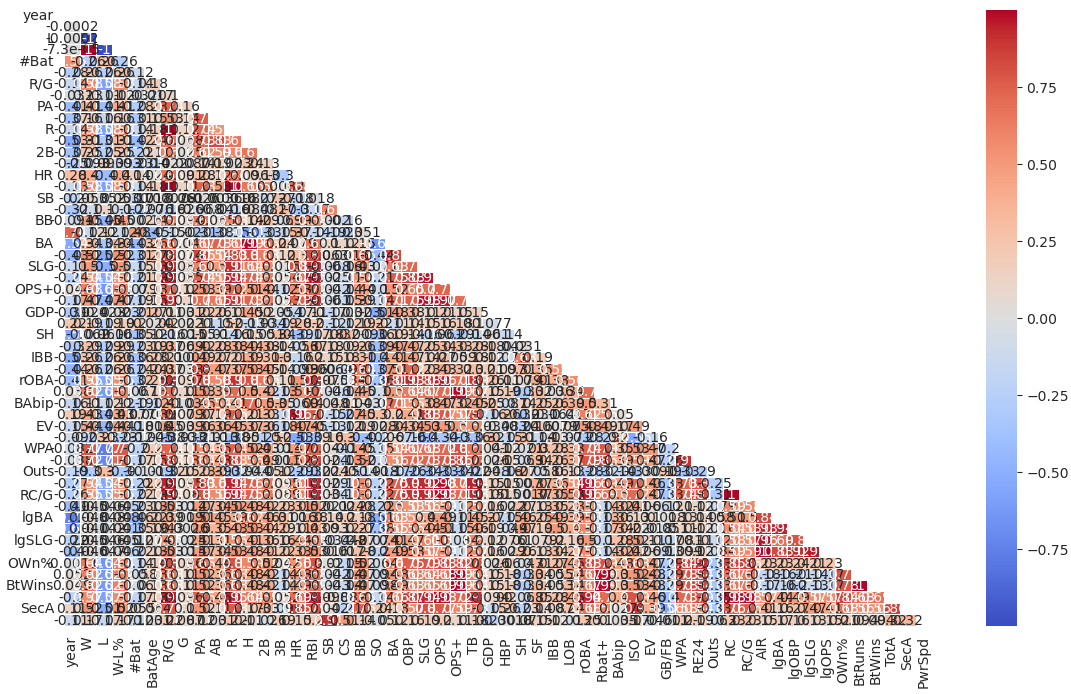

In [19]:
mask = np.zeros_like(csv_dfs['team_batting_stats'].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(csv_dfs['team_batting_stats'].corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True)

In [ ]:
mask = np.zeros_like(csv_dfs['player_batting_advanced_2005_2014'].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(csv_dfs['player_batting_advanced_2005_2014'].corr(), mask=mask, cmap='coolwarm',
                     linewidths=.5, annot=True)

## Tests

Test code here if you want to run stats tests.

## Models

Test code here if you want to run ML models.

## Conclusions

<div style="border: 5px solid black;"></div>

Potential urls to scrape

In [ ]:
'''
    batting_url = f'https://www.baseball-reference.com/teams/{team}/{year}-{bat_pit_field}.shtml'
'''

'''https://baseballsavant.mlb.com/leaderboard/custom?
            year=2022,2021,2020,2019,2018,2017,2016,2015,2014
            &type=batter&filter=&sort=0&sortDir=asc&min=q
            &selections=player_age,b_ab,b_total_pa,b_total_hits,b_single,b_double,b_triple,
            b_home_run,b_strikeout,b_walk,b_k_percent,b_bb_percent,batting_avg,slg_percent,
            on_base_percent,on_base_plus_slg,isolated_power,b_rbi,b_lob,b_total_bases,r_total_caught_stealing,
            r_total_stolen_base,b_ab_scoring,b_ball,b_called_strike,b_catcher_interf,b_foul,b_foul_tip,b_game,
            b_gnd_into_dp,b_gnd_into_tp,b_gnd_rule_double,b_hit_by_pitch,b_hit_ground,b_hit_fly,b_hit_into_play,
            b_hit_line_drive,b_hit_popup,b_out_fly,b_out_ground,b_out_line_drive,b_out_popup,b_intent_ball,
            b_intent_walk,b_interference,b_pinch_hit,b_pinch_run,b_pitchout,b_played_dh,b_sac_bunt,b_sac_fly,
            b_swinging_strike,r_caught_stealing_2b,r_caught_stealing_3b,r_caught_stealing_home,r_defensive_indiff,
            r_interference,r_pickoff_1b,r_pickoff_2b,r_pickoff_3b,r_run,r_stolen_base_2b,r_stolen_base_3b,
            r_stolen_base_home,b_total_ball,b_total_sacrifices,b_total_strike,b_total_swinging_strike,b_total_pitches,
            r_stolen_base_pct,r_total_pickoff,b_reached_on_error,b_walkoff,b_reached_on_int,xba,xslg,woba,xwoba,xobp,
            xiso,wobacon,xwobacon,bacon,xbacon,xbadiff,xslgdiff,wobadiff,exit_velocity_avg,launch_angle_avg,
            sweet_spot_percent,barrel,barrel_batted_rate,solidcontact_percent,flareburner_percent,poorlyunder_percent,
            poorlytopped_percent,poorlyweak_percent,hard_hit_percent,avg_best_speed,avg_hyper_speed,
            &chart=false&x=xba&y=xba&r=no&chartType=beeswarm'''

print()

## README

# Baseball Analysis

This repo is made to provide baseball data to perform analysis, (statistical) tests/simulations, and (ML) modeling. Feel free to create a new notebook or python file if you have any analyses or models you want to run.

Note on the data:
- 
- There are only 30 teams, so although there are lots of features (stats), there can only be so many rows of data, as each row represents the team's stats for the year. The amount of rows is 30 times the number of years.
- Players' stats, on the other hand, can offer thousands of rows to analyze.
- 2020 and 2023 data don't offer a full season's worth of stats, so these are left out, but can be accessed with the functions in `acquire.py`

Possible questions to answer and tasks to do:

#### Join team DataFrames (DONE)

- Desired Result(s):
    - team_batting.csv: combine batting stats for all years (2005 - 2022)
    - team_pitching.csv: combine pitching stats for all years
    - **maybe** team_stats.csv: combine batting and pitching stats for all years
        - might be better to keep pitching and batting stats separate
- assuming these csv's are joined right, we can save them and delete the original csv's. 

#### Join player DataFrames (DONE)

- Desired Result(s): 
    - combine 2005-2014 data with 2015-2022 data
    - combine metrics (standard, advanced, sabermetric).
        - this may be a tougher task because the rows for each metric don't match (i.e. `player_batting_advanced.csv` doesn't have the same number of rows as `player_batting_standard.csv`)
        - also think about how to join the tables. You can't merely join on player name, as players share names. And you can't only join on player ID because these are duplicated. maybe join on a combination of columns.
    - don't combine pitcher and batter data



#### Explore and Analysis

Ideas for EDA:

- explore which stats most relate to wins and/or runs scored
- explore which stats relate to others


Visualization ideas:


#### Stats Testing

Ideas for Testing:

- Which features correlate most to wins ('W'


#### Modeling

Ideas for models:

In [ ]:
stats = {}
for x in ['standard', 'advanced', 'sabermetric']:
    for y in ['batting', 'pitching']:
        url = f'https://www.baseball-reference.com/leagues/majors/2022-{x}-{y}.shtml'
        # Read url and return parsed HTML
        soup = read_website(url)

        # Find all the table elements
        table_elements = soup.find_all('table')

